#Постановка краевой задачи для обыкновенных дифференциальных уравнений второго порядка и обзор методов решения.


На практике приходится часто решать задачи, когда условия задаются при двух значения независимой переменной (на концах рассматриваемого отрезка). Такие задачи называются краевыми, получаются при решении уравнений высших порядков или систем уравнений. 

Рассмотрим линейное дифференциальное уравнение второго порядка
$$
\frac{d^2 y}{d x^2}+\rho(x) \frac{d y}{d x}+q(x) y+f(x)=0, \quad 0<x<l .
$$
Краевые условия в общей форме запишем в виде:
$$
\begin{gathered}
-\alpha_1 \frac{d y(0)}{d x}+\beta_1 y(0)=\gamma_1, \\
\alpha_2 \frac{d y(l)}{d x}+\beta_2 y(l)=\gamma_2 .
\end{gathered}
$$
Здесь $x$ - независимая переменная, изменяющаяся от $x=0$ до $x=l$; $y=y(x)$ - искомая функция; $\rho(x), q(x)$ и $f(x)$ - заданные функции, которые чаще всего на промежутке $x \in[0, l]$ являются непрерывными; $\alpha_1$, $\beta_1, \gamma_1, \alpha_2, \beta_2, \gamma_2$ - заданные числа, определяющие вид граничных условий. Требуется найти такое решение $y(x)$ уравнения, которое при стремлении $x$ к точке $x=0$ справа удовлетворяло бы первому граничному условию, а при стремлении $x$ к правой границе $x=l$ слева (изнутри области) - удовлетворяло бы второму граничному условию.



В этом семинаре мы рассмотрим три группы методов решения краевых задач. Отнесем к первой группе такие методы, когда решение краевой задачи сводится к решению нескольких задач Коши. Известно, что решение задач Коши можно реализовать с любой заданной точностью различными методами.

Здесь будут рассмотрены метод стрельбы и его улучшение с помомщью интерполяции, метод дифференциальной прогонки и непрерывный метод Ньютона. 

Ко второй группе методов решения краевых задач относится метод конечных разностей. При этом дифференциальные операторы заменяются разностными, а дифференциальные уравнения превращаются в алгебраические или даже СЛАУ. Нелинейные системы уравнений обычно решают методом Ньютона.  

К третьей группе относятся проекционные методы - решение представляется в виде суммы ряда из функций специального вида, при подстановке этого ряда в уравнение получаем систему алгебраических или линейных уравнений. Обычно реализация таких методов более громоздка.

Во всех группах методов также нередко используют квазилинеаризацию, с помощью которой решение исходной нелинейной задачи сводится к решению последовательности линейных краевых задач. 

В другом файле подробно разобран метод Ньютона-Канторовича из 3 группы методов, использующий квазилинеаризацию. Здесь ниже есть задача, которую предлагается решить аналогичным образом, используя теорию и код из файла. 


Помимо рассмотренных существуют также вариационные методы (например, метод Ритца) и метод конечных элементов, основанный на них.  

Метод конечных элементов очень сложен для реализации вручную и для его освоения нужен отдельный учебный курс. Но во многих пакетах моделирования он уже встроен. Кроме того, существует открытый проект, позволяющий решать с его помощью на Python и C++ произвольные собственные задачи
https://fenicsproject.org/  


#Задание 1. Метод линейной интерполяции.

##Описание метода.

Рассмотрим смешанную краевую задачу для уравнения

 $y^{\prime \prime}+p(x) y^{\prime}+q(x) y+f(x)=0, \quad 0<x<l .$


Граничные условия возьмем в виде

$$
\begin{gathered}
y(0)=a, \\
y^{\prime}(l)+\alpha y(l)=b .
\end{gathered}
$$  

Выберем любые два значения $\lambda=\lambda_{1}, \lambda=\lambda_{2}$ и решим две задачи Коши с начальными условиями:

$$
\begin{aligned}
&y_{1}(0)=a, y_{1}^{\prime}(0)=\lambda_{1} \\
&y_{2}(0)=a, y_{2}^{\prime}(0)=\lambda_{2}
\end{aligned}
$$

Полученные решения обозначим как $y=y_{1}(x)$ и $y=y_{2}(x)$. Найдем соответствующие значения левых частей в граничном условии.  

\begin{aligned}
&y_{1}^{\prime}(l)+\alpha y_{1}(l)=b_{1} \\
&y_{2}^{\prime}(l)+\alpha y_{2}(l)=b_{2}
\end{aligned}

Теперь значение недостающего начального условия $y^{\prime}(0)=\lambda$ можно найти с помощью линейной интерполяции:

$$
\frac{\lambda-\lambda_{1}}{\lambda_{2}-\lambda_{1}}=\frac{b-b_{1}}{b_{2}-b_{1}} \text {, T.e. } \lambda=\lambda_{1}+\left(\lambda_{2}-\lambda_{1}\right) \frac{b-b_{1}}{b_{2}-b_{1}} .
$$

Полученное значение $\lambda$ и будет являться недостающим начальным условием. Объясняется это линейностью задачи. Как известно, дифференциальное уравнение имеет общее решение

$$
y(x)=c_{1} u_{1}(x)+c_{2} u_{2}(x)+y_{n}(x),
$$

где $u_{1}(x)$ и $u_{2}(x)$ - линейно-независимые решения однородного уравнения (при $f(x) \equiv 0)$, а $y_{n}(x)$ - какое-либо решение неоднородного уравнения (частное решение неоднородного уравнения). Удовлетворяя левому граничному условию, в общем решении останется одна неизвестная постоянная, которая входит в выражение для $y(x)$ линейным образом. Проведя в плоскости $(\lambda, b)$ прямую, проходящую через две точки $\left(\lambda_{1}, b_{1}\right)$ и $\left(\lambda_{2}, b_{2}\right)$ при заданном значении $b$ мы однозначно найдем точное значение $\lambda$.  

Теперь таблицу значений функции $y(x)$ (и ее производной) можно найти интерполяцией $y(x)=y_{1}(x)+\left[y_{1}(x)-y_{1}(x)\right] \cdot \frac{\lambda-\lambda_{1}}{\lambda_{2}-\lambda_{1}}$.

Однако на практике, жертвуя машинным временем, обычно проводят третий расчет задачи Коши с условиями
$$
y(0)=a, \quad y^{\prime}(0)=\lambda .
$$  

Замечание.

 На практике обычно выбирают простейшие значения $\lambda$, например $\lambda_{1}=1$ и $\lambda_{2}=0$. При этом, если само уравнение является однородным, т.е. $f(x) \equiv 0$, и граничное условие так же однородное, $y(0)=0$, то решение имеет вид $y_{2}(x) \equiv 0, b_{2}=0$. Тогда второй расчет (при $\lambda_{2}=0$ ) нет необходимости производить и формула даст ответ в виде

$$
\lambda=\lambda_{1} \frac{b}{b_{1}} .
$$

Поэтому, если предложено решить однородное уравнение, то следует посмотреть, есть ли однородное граничное условие и если оно есть, то начинать расчет следует от этой границы! Эта рекомендация остается в силе и для других методов решения краевых задач.



##Задание.

Решить краевую задачу:

$$
\begin{aligned}
&y^{\prime \prime}+(1-4 x) y^{\prime}+8 y=5, \quad 0<x<1 \\
&y^{\prime}(0)-y(0)=0 ; \quad y(1)=0
\end{aligned}
$$ 


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

In [2]:
def f(x, y):
     return y[1], (4 * x - 1) * y[1] - 8 * y[0] + 5

$\lambda_1 = 1$, $\lambda_2 = 0$

In [12]:
n = 100
x = np.linspace(0, 1, n)
b = 0
y0_1 = (0.0, 1.0) # для lambda1 = 1
y0_2 = (0.0, 0.0) # для lambda2 = 0
sol_1 = solve_ivp(f, (x[0], x[-1]), y0=y0_1, method='RK23', t_eval=x).y
sol_2 = solve_ivp(f, (x[0], x[-1]), y0=y0_2, method='RK23', t_eval=x).y

b_1 = sol_1[1, 0] - sol_1[0, 0]
b_2 = sol_2[1, 0] - sol_2[0, 0]

lamb = (b - b_1) / (b_2 - b_1)
sol = solve_ivp(f, (x[0], x[-1]), y0=(0.0, lamb), method='RK23', t_eval=x).y
lamb

1.0

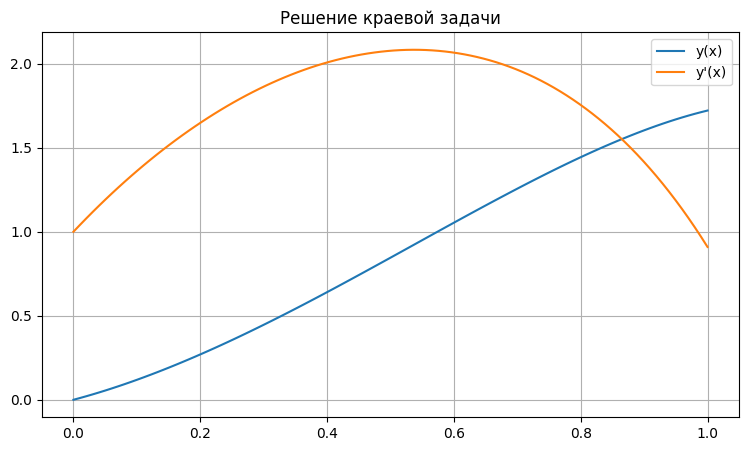

In [13]:
plt.figure(figsize=(9,5))
plt.plot(x, sol[0, :], label="y(x)")
plt.plot(x, sol[1, :], label="y'(x)")
plt.title('Решение краевой задачи')
plt.legend()
plt.grid();
plt.show()


#Задание 2. Метод дифференциальной прогонки.



##Описание метода.


In [ ]:
grid = np.linspace(0, np.pi / 2.0, n)

In [21]:
def f_1(x):
    return -0.73 * np.cos(x) - 0.441 * np.sin(x) + 0.25 * (x**2 * np.sin(x) + x * np.cos(x))


def f_a(x, y):
    return (
        -y[0]**2 - 1,
        -y[0] * y[1] + x * np.cos(x)
                                    )

def f(x, y):
    return (
        y[1],
        -y[0] + x * np.cos(x)
                )

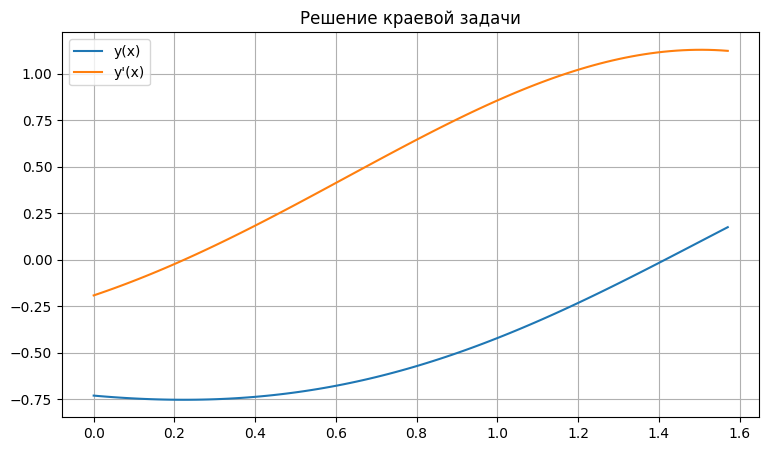

In [30]:
n = 100
a0 = (3, 2)
x = np.linspace(0, np.pi / 2.0, n)

a = solve_ivp(f_a, (x[0], x[-1]), y0=a0, method='RK23', t_eval=x).y

sol_1 = (2 - a[1, -1]) / (a[0, -1] + 5)
sol_2 = (-5 * a[1, -1] - 2 * a[0, -1]) / (-5 - a[0, -1]) 


sol = solve_ivp(f, (x[-1], x[0]), y0=(sol_1, sol_2), method='RK23', t_eval=x[::-1]).y

plt.figure(figsize=(9,5))
plt.plot(x, sol[0,  ::-1], label="y(x)")
plt.plot(x, sol[1,  ::-1], label="y'(x)")
plt.title('Решение краевой задачи')
plt.legend()
plt.grid();
plt.show()



Суть метода прогонки заключается в следующем. Основываясь на
форме граничного условия в начальной точке, выводится обыкновенное
дифференциальное уравнение, порядок которого на единицу меньше порядка заданного дифференциального уравнения и коэффициенты которого включают неизвестные функции. Количество таких неизвестных функций равно порядку исходного уравнения. Если выведенное уравнение продифференцировать, то новое уравнение будет иметь тот же порядок, что и заданное. Приравнивая коэффициенты этих двух уравнений, получаем систему дифференциальных уравнений первого порядка, интегрированием которой можно получить неизвестные коэффициенты. В частности, решения в конечной точке совместно с граничными условиями в этой точке составляют полый набор уравнений для нахождения всех граничных значений. Этот этап называется прямой прогонкой. Зная полный набор граничных условий в конечной точке, исходное уравнение
можно проинтегрировать как задачу Коши от начальной до конечной
точки. Таким образом удается избежать итераций.

Рассмотрим граничную задачу, определяемую дифференциальным уравнением
и граничными условиями

$\frac{d^{2} y}{d x^{2}}=p(x) y+q(x)$,

 $\frac{d y(a)}{d x}=\alpha_{00} y(a)+\alpha_{10}$, 
 
 $\frac{d y(b)}{d x}=\beta_{00} y(b)+\beta_{10}$; 
 
 $\alpha_{00}, \beta_{00}, \alpha_{10}, \beta_{10}-$ константы, 
 
 где $p(x)$ и $q(x)$ - непрерывные функциий

Рассмотрим линейное дифференциальное уравнение первого порядка
$$
\frac{d y}{d x}=\alpha_{0}(x) y(x)+\alpha_{1}(x),
$$
и выберем $\alpha_{0}(x)$ и $\alpha_{1}(x)$ так, чтобы $y(x)$ удовлетворяло уравнению. Продифференцировав последнее по $x$, получим

$$
\frac{d^{2} y}{d x^{2}}=\left(d \alpha_{0} / d x\right) y+d \alpha_{1} / d x+\alpha_{0} d y / d x .
$$

Заменив здесь $d y / d x$ выражением, стоящим в правой части, получим

$$
\frac{d^{2} y}{d x^{2}}=\left(d \alpha_{0} / d x+\alpha_{0}^{2}\right) y+d \alpha_{1} / d x+\alpha_{0} \alpha_{1} .
$$

Из сравнения с исходным уравнением получаем следующие уравнения:  

\begin{gathered}
d \alpha_{0}(x) / d x+\alpha_{0}^{2}=p(x) \\
d \alpha_{1}(x) / d x+\alpha_{0}(x) \alpha_{1}(x)=q(x)
\end{gathered}

В качестве первого шага проинтегрируем на отрезке $a<x<b$ эти два уравнения  как задачу Коши, приняв в качестве начальных значений

$$
\alpha_{0}(a)=\alpha_{00}, \quad \alpha_{1}(a)=\alpha_{10},
$$

получим значения $\alpha_{0}(b)$ и $\alpha_{1}(b)$. Подставив найденные значения в дифференциальное уравнение первого порядка, получим 

$$ d y(b) / d x=\alpha_{0}(b) y(b)+\alpha_{1}(b) . $$

С другой стороны, второе граничное условие исходного уравнения при $x=b$ дает

$$ d y(b) / d x=\beta_{00} y(b)+\beta_{10} $$ 


Так как теперь $\alpha_{0}(b)$ и $\alpha_{1}(b)-$ известные величины, уравнения первого порядка на альфа можно разрешить относительно $y(b)$ и $d y(b) / d x$ и получить

\begin{gathered}
y(b)=\left[\beta_{10}-\alpha_{1}(b)\right] /\left[\alpha_{0}(b)-\beta_{00}\right] \\
d y(b) / d x=\left[\beta_{00} \alpha_{1}(b)-\beta_{10} \alpha_{0}(b)\right] /\left[\beta_{00}-\alpha_{0}(b)\right]
\end{gathered}  



Теперь задачу Коши, определяемую исходным уравнением и этими последними и начальными условиями можно проинтегрировать назад от $x=b$. Другая возможность заключается в том, чтобы проинтегрировать дифференциальное уравнение первого порядка, используя предпоследнее выражение в качестве начального условия.  





 ## Задание.

Рассмотрим решение следующей граничной задачи

$$
\begin{gathered}
d^{2} y / d x^{2}=-y+x \cos x \\
\\
d y(0) / d x=3 y(0)+2, \quad d y(\pi / 2) / d x=-5 y(\pi / 2)+2 .
\end{gathered}
$$

Известно точное решение этой задачи


$$
y=-0.73 \cos x-0.441 \sin x+(1 / 4)\left(x^{2} \sin x+x \cos x\right),
$$


откуда


$$
y(\pi / 2)=0.175 \text { и } d y(\pi / 2) / d x=1.122 .
$$


Найдите эти граничные значения, решая задачу методом дифференциальной прогонки. 

#Задача 3.  Метод Ньютона для непрерывного случая.

##Описание метода Ньютона.


Рассмотрим краевую задачу, определяемую дифференциальным уравнением второго порядка и граничными условиями


$\begin{array}{lc}y(0)=0 &  \\ y(l)=A &  \\ \text { в виде системы двух дифференциальных }\end{array}$

 $$ \left\{\begin{array}{l}d y / d x=u, \\ d u / d x=f(x, y, u) .\end{array}\right. $$


Обозначим недостающее начальное значение производной через $s$ :
$$
d y(0) / d x=u(0)=s .
$$
Задача заключается в том, чтобы найти такое значение $s$, при котором решение задачи Коши с такими начальными удовлетворяет правому граничному условию. Иначе говоря, если решение задачи Коши обозначить через $y(x, s)$ и $u(x, s)$, то требуется найти такое значение $s$, что
$$
y(l, s)-A=\varphi(s)=0 .
$$

В методе Ньютона итерационная формула для $s$ задается в виде

$$
s^{(n+1)}=s^{(n)}-\frac{\varphi\left(s^{(n)}\right)}{d \varphi\left(s^{(n)}\right) / d s}
$$

Или

$$
s^{(n+1)}=s^{(n)}-\frac{y\left(l, s^{(n)}\right)-A}{\partial y\left(l, s^{(n)}\right) / \partial s}
$$ 

Чтобы найти производную $y$ по $s$, продифференцируем систему по $s$ и получим 

\begin{gathered}
d Y / d x=U, \quad d U / d x=(\partial f / \partial y) Y+(\partial f / \partial u) U \\
Y(0)=0, \quad U(0)=1 \\
Y=\partial y / \partial s, \quad U=\partial u / \partial s
\end{gathered}

Итак, получаем алгоритм действий.

1. Выбирается значение $s$ для недостающего начального значения производной. Это приближенное значение $s$ обозначается через $s^{(1)}$.
2. Интегрируется задача Коши  от $x=0$ до $x=l$.
3. Интегрируются уравнения с Y и U от $x=0$ до $x=l$.
4. Значения $y\left(l, s^{(1)}\right)$ и $Y\left(l, s^{(1)}\right)$, подставляются в формулу для $s^{(2)}$, что дает

$$
s^{(2)}=s^{(1)}-\left[y\left(l, s^{(1)}\right)-A\right] / Y\left(l, s^{(1)}\right),
$$

следующее приближение $s^{(2)}$ для недостающего начального значения производной.
5. Шаги $2-4$ повторяются до тех пор, пока величина $s$ не будет найдена с заданной точностью.  
 

##Задание.


Напишите программу, которая решает нелинейное уравнение Пуассона:


$$
\phi^{\prime \prime}(x)=e^{\phi(x)}-n(x), \quad \text { где } n(x)=1+e^{-3(x-5)^{2}}  
$$


в области $0<=x<=10$ с граничными условиями $\phi(0)=\phi(10)=0 .$



#Задача 4.  Метод Ньютона в конечно-разностном случае.


Напишите программу, которая решает нелинейное уравнение Пуассона:


$$
\phi^{\prime \prime}(x)=e^{\phi(x)}-n(x), \quad \text { где } n(x)=1+e^{-3(x-5)^{2}}  
$$


в области $0<=x<=10$ с граничными условиями $\phi(0)=\phi(10)=0 .$

Используйте решение методом Ньютона системы разностных уравнений. Для этого дискретизуйте дифференциальное уравнение на равномерную решётку $x_{j=1, \ldots, N-1}$, так что значения потенциала в точках $x_{0}=0$ и $x_{N}=10$ зафиксированы граничными условиями, а внутри определяются дискретной версией исходного дифференциального уравнения: $G_{1}=0, G_{2}=0, \ldots, G_{N-1}=0$, где

$$
G_{j}=\frac{\phi_{j+1}-2 \phi_{j}+\phi_{j-1}}{\delta x^{2}}-e^{\phi_{j}}+n\left(x_{j}\right)=0
$$

Используйте метод Ньютона (можно написать самостоятельно, можно использовать scipy) для того, чтобы найти решение этой системы. Сколько итераций нужно, чтобы получить решение с $10ю$ значащими цифрами?

#Задача 5. Метод квазилинеаризации.

##Описание метода.

Рассмотрим нелинейное дифференциальное уравнение второго порядка

$$
\begin{gathered}
y^{\prime \prime}=f\left(x, y, y^{\prime}\right) \\
y(0)=0, \quad y(L)=A,
\end{gathered}
$$


где символами $y^{\prime}$ и $y^{\prime \prime}$ обозначены соответственно $d y / d x$ и $d^{2} y / d^{2} x$.
Перепишем уравнение в виде

$$
\varphi\left(x, y, y^{\prime}, y^{\prime \prime}\right)=y^{\prime \prime}-f\left(x, y, y^{\prime}\right)=0 .
$$

Чтобы получить рекуррентное соотношение, обозначим $n$ - ю и $(n+1)$ - ю итерации через $y_{n}$ и $y_{n+1}$ и потребуем, чтобы для итераций выполнялось условие $\varphi=0$. Это позволяет написать для $n$ - й итерации
$$
y_{n}^{\prime \prime}-f\left(x, y, y^{\prime}\right)=0 .
$$  

Для $(n+1)$ - й итерации получаем

$$
\begin{aligned}
\varphi\left(x_{n+1},\right.&\left.y_{n+1}, y_{n+1}^{\prime}, y_{n+1}^{\prime \prime}\right)=\varphi\left(x_{n}, y_{n}, y_{n}^{\prime}, y_{n}^{\prime \prime}\right)+\\
&+(\partial \varphi / \partial y)_{n}\left(y_{n+1}-y_{n}\right)+\left(\partial \varphi / \partial y^{\prime}\right)\left(y_{n+1}^{\prime}-y_{n}^{\prime}\right)+\\
+&\left(\partial \varphi / \partial y^{\prime \prime}\right)_{n}\left(y_{n+1}^{\prime \prime}-y_{n}^{\prime \prime}\right)+\ldots=0
\end{aligned}
$$  

или

$$
-(\partial f / \partial y)_{n}\left(y_{n+1}-y_{n}\right)-\left(\partial f / \partial y^{\prime}\right)_{n}\left(y_{n+1}^{\prime}-y_{n}^{\prime}\right)+y_{n+1}^{\prime \prime}-y_{n}^{\prime \prime}=0
$$  

В итоге получаем, что на каждом шаге итерации надо решать краевую задачу.

\begin{aligned}
&y_{n+1}^{\prime \prime}-\left(\partial f / \partial y^{\prime}\right)_{n} y_{n+1}^{\prime}-(\partial f / \partial y)_{n} y_{n+1}= \\
&=f\left(x, y_{n}, y_{n}^{\prime}\right)-(\partial f / \partial y)_{n} y_{n}-\left(\partial f / \partial y^{\prime}\right)_{n} y_{n}^{\prime}
\end{aligned}  

$$y_{n+1}(0)=0, \quad y_{n+1}(L)=A$$  





##Задание.


Напишите программу, которая решает нелинейное уравнение Пуассона:


$$
\phi^{\prime \prime}(x)=e^{\phi(x)}-n(x), \quad \text { где } n(x)=1+e^{-3(x-5)^{2}}  
$$


в области $0<=x<=10$ с граничными условиями $\phi(0)=\phi(10)=0 .$


Используйте описанный выше метод квазилинеаризации.

#Задача 6. Метод Ньютона-Канторовича.

##Описание метода.

1. Выписать формулы метода для краевой задачи
$$
\begin{gathered}
-\ddot{x}+f(t, x, \dot{x})=0, \\
x(a)=\alpha_0, \quad x(b)=\alpha_1 .
\end{gathered}
$$
Они имеют вид
$$
\begin{array}{r}
-\ddot{x}_{n+1}+f_x^{\prime}\left(t, x_0(t), \dot{x}_0(t)\right) x_{n+1}+f_{\dot{x}}^{\prime}\left(t, x_0(t), \dot{x}_0(t)\right) \dot{x}_{n+1}= \\
f_x^{\prime}\left(t, x_0(t), \dot{x}_0(t)\right) x_n(t)+f_{\dot{x}}^{\prime}\left(t, x_0(t), \dot{x}_0(t)\right) \dot{x}_n(t)-f\left(t, x_n(t) \dot{x}_n(t)\right), \\
x_{n+1}(a)=\alpha_0, \quad x_{n+1}(b)=\alpha_1,
\end{array}
$$
$\mathrm{B}$ качестве начального приближения $x_0(t)$ можно взять линейную функцию $G(t)$, удовлетворяющую краевым условиям  (см. п.2).

Возникает серия $(\mathrm{n}=0,1,2, \ldots)$ линейных задач вида

$$
\begin{gathered}
p(t) \ddot{x}_{n+1}+q(t) \dot{x}_{n+1}+r(t) x_{n+1}=\tilde{g}\left(t, x_n(t), \dot{x}_n(t)\right), \\
x_{n+1}(a)=\alpha_0, x_{n+1}(b)=\alpha_1,
\end{gathered}
$$
которую следует решить одним из проекционных методов.

2. Свести линейную задачу  к задаче с нулевыми краевыми условиями, сделав замену переменных $x_{n+1}(t)=y_{n+1}(t)+G(t)$, где $G(t) \in$ $C_{[a, b]}^2$ удовлетворяет краевым условиям. Например, 

$G(t)=\left[\alpha_0(b-t)+\right.$ $\left.\alpha_1(t-a)\right] /(b-a)$. 

В этом случае можно положить $y_0(t)=0$

3. Линейную задачу для новой переменной $y_{n+1}(\mathrm{n}=0,1,2, \ldots)$
$$
\begin{gathered}
p(t) \ddot{y}_{n+1}+q(t) \dot{y}_{n+1}+r(t) y_{n+1}=g_n(t), \\
y_{n+1}(a)=0, y_{n+1}(b)=0,
\end{gathered}
$$
решить проекционным методом. Здесь 

$g_n(t)=\widetilde{g}\left(t, y_n(t)+G(t), \dot{y}_n(t)+\dot{G}(t)\right)-$ $q(t) \dot{G}(t)-r(t) G(t)$

Для $n=0$ первое приближение $y_1(t)$ к решению ищется в виде
$$
y^N(t)=\sum_{k=1}^N a_k e_k(t),
$$
где $\left\{e_k(t)\right\}$ - координатная система.

В качестве координатной системы можно взять:

a) тригонометрические многочлены $e_k(t)=\sin \pi k(t-a) /(b-a), k=0,1, \ldots$, либо

b) алгебраические многочлены $e_k(t)=(t-a)(b-t) P_{k-1}(t), k=0,1, \ldots$, где $P_k-$ алгебраический полином степени $k$. 

Можно положить $P_k(t)=t^k$, либо взять многочлены Лежандра степени $k$, которые ортогональны в $L_2[-1,1]$. Если выбираются многочлены Лежандра, то следует от промежутка $[a, b]$ перейти к отрезку $[-1,1]$ с помощью замены $\tau=(2 t-a-b) /(b-a), t \in$ $[a, b], \tau \in[-1,1]$. Сделать замену переменных в линейной краевой задаче, учитывая, что 

$y_t^{\prime}=y_\tau^{\prime} \tau_t^{\prime}=y_\tau^{\prime} 2 /(b-a), \quad y_{t^2}^{\prime \prime}=y_{\tau^2}^{\prime \prime} 4 /(b-a)^2$

4. В методе Галёркина коэффициенты $a_k$ ищутся из системы
$$
\begin{gathered}
\sum_{k=1}^N a_k \int_a^b\left[p(t) \ddot{e}_k(t)+q(t) \dot{e}_k(t)+r(t) e_k(t)\right] e_j(t) d t=\int_a^b g_n(t) e_j(t) d t \\
j=1, \ldots, N .
\end{gathered}
$$

5. В методе наименьших квадратов коэффициенты $a_k$ ищутся из системы
$$
\begin{gathered}
\sum_{k=1}^N a_k \int_a^b\left[p(t) \ddot{e}_k(t)+q(t) \dot{e}_k(t)+r(t) e_k(t)\right]\left[p(t) \ddot{e}_j(t)+q(t) \dot{e}_j(t)+r(t) e_j(t)\right] d t= \\
\int_a^b g_n(t)\left[p(t) \ddot{e}_j(t)+q(t) \dot{e}_j(t)+r(t) e_j(t)\right] d t, j=1, \ldots, N
\end{gathered}
$$ 

6. В методе коллокаций коэффициенты $a_k$ ищутся из системы

$$
\sum_{k=1}^N a_k\left[p\left(t_j\right) \ddot{e}_k\left(t_j\right)+q\left(t_j\right) \dot{e}_k\left(t_j\right)+r\left(t_j\right) e_k\left(t_j\right)\right]=g_n\left(t_j\right), j=1, \ldots, N
$$

В качестве узлов коллокации $t_j$ выбрать нули многочлена Чебышёва $T_N(t)$ степени $N$, которые заключены в интервале $(-1,1)$ и вычисляются по явным формулам
$$
t_j=\cos \frac{2 j-1}{2 N} \pi, j=1, \ldots, N
$$
В этом методе также надо перейти от отрезка $[a, b]$ к отрезку $[-1,1]$.

7. Линейные алгебраические системы решать любым библиотечным методом.

Номер $N$ выбирать из условия $\left\|y^N-y^{N+1}\right\|<\varepsilon$, где $\varepsilon$-заданная точность. Часто достаточно взять $N=5$.

8. Положить $y_1(t)=y^N(t)$.

9. Найденное $x_N(t)=y_N(t)+G(t)$ сравнить с точным решением. Если $\left\|x_N-x^*\right\|>\varepsilon$, то положить $n=1$ и перейти к нахождению следующего приближения $y_2(t)$ и т.д., пока не будет достигнута нужная точность.

##Задание.

Методом Ньютона-Канторовича найти первые два приближения к решению краевой задачи. Сравнить приближенное решение с точным. Оценить относительную погрешность решения.

На выбор можете взять любую из задач и любой проекционный метод, кроме разложения по синусам и косинусам в методе Галёркина. 

1) $-\ddot{x}=-\dot{x} /(1+t)+\dot{x}^2 / x, x(0)=2, x(1)=1$

Точное решение: $x^*(t)=\left[5-(1+t)^2\right]^{1 / 2}$.

2) $\ddot{x}=\left(\dot{x}^2+1\right)^{3 / 2}, x(0)=-1, x(1)=0$. 

Точное решение: $x^*(t)=-\left(1-t^2\right)^{1 / 2}$.

3) $\ddot{x}=x^3, \quad x(0)=\sqrt{2}, x(1)=1 / \sqrt{2}$. 

Точное решение: $x^*(t)=\sqrt{2} /(1+t)$.

4) $-\ddot{x}=-\left(\dot{x}^2+1\right) /\left(1+t^2\right), x(0)=0, x(1)=-1 / 2$.

Точное решение: $x^*(t)=-t^2 / 2$.

5) $-\ddot{x}+10 t^{-5} x^2=4 t, x(1)=1, x(2)=8$. 

Точное решение: $x^*(t)=t^3$.

6) $-\ddot{x}+2 t^{-10} x^3=-10 t^2, x(1)=1, x(2)=32$.

Точное решение: $x^*(t)=t^4$.

7) $\ddot{x}=-4 x^{-3}, x(0)=2, x(1)=\sqrt{3}$. 

Точное решение: $x^*(t)=\sqrt{4-t^2}$.

8) $\ddot{x}=2 x^3, x(0)=1 / 2, x(1)=1 / 3$. 

Точное решение: $x^*(t)=1 /(2+t)$.

9) $\ddot{x}=-25 x^{-3}, x(0)=4, x(1)=3$. 

Точное решение: $x^*(t)=\sqrt{25-(3+t)^2}$.

10) $-\ddot{x}=x^3-3 t^2 x^5, x(2)=1 / \sqrt{3}, x(3)=1 / \sqrt{8}$.

Точное решение: $x^*(t)=1 / \sqrt{t^2-1}$


11) $\ddot{x}=12 t x^2, x(1)=1, x(2)=1 / 8$. 

Точное решение: $x^*(t)=t^{-3}$.

12) $\ddot{x}=20 t^2 x^2, x(1)=1, x(2)=1 / 16$. 

Точное решение: $x^*(t)=t^{-4}$. 